**Importing the libraries**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Reading the dataset**

In [ ]:
df=pd.read_csv('Cricket.csv',encoding='latin')

In [ ]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16


In [ ]:
df.shape

(79, 13)

In [ ]:
X = df.iloc[:, [7, 9]].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

**Within-cluster sums of squares**

**Elbow Method** 

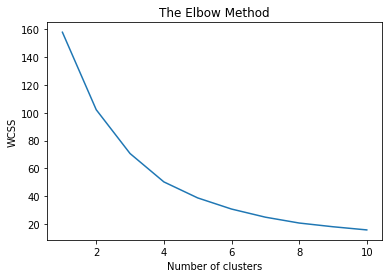

In [ ]:
from sklearn.cluster import KMeans
wcss = []   #within-cluster sums of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

**Plotting the graph with 5 clusters**

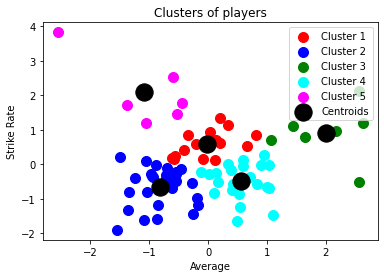

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.legend()
plt.show()